In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt 
import numpy as np


1 Crei un dataframe Pandas contenente le informazioni presenti nella collection


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


2 Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
df = df.filter(['borough','cuisine', 'name'])
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


3 Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df['borough']=='Missing'].count()

borough    51
cuisine    51
name       51
dtype: int64

4 Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
df['borough'].replace("Missing",np.nan, inplace = True)


5 Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df[df['borough'].isnull()]


,borough,cuisine,name
16170,NaN,Café/Coffee/Tea,Starbucks Coffee
18667,NaN,Mexican,Place To Beach Cantina
20016,NaN,Bakery,Paris Baguette
20246,NaN,Chinese,Unique Bakery
20385,NaN,Delicatessen,Rosedale Delicatessen
20504,NaN,Chicken,Kfc
20509,NaN,American,Crowne Plaza-Jfk Airport
20518,NaN,Chicken,Kfc
20582,NaN,Café/Coffee/Tea,By The Way Bakery
20591,NaN,Caribbean,Golden Krust


In [ ]:
df['borough'].dropna(inplace = True) #dropna serve a togliere gli elementi con NaN

In [ ]:
df.count()

borough    25308
cuisine    25359
name       25208
dtype: int64

6 Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina che ha più ristoranti

In [ ]:
df1 = df.groupby('cuisine',as_index=False)['name'].count().sort_values('name',ascending = False)
df1

,cuisine,name
2,American,6183
19,Chinese,2418
13,Café/Coffee/Tea,1214
62,Pizza,1163
46,Italian,1069
...,...,...
44,Iranian,2
65,Polynesian,1
15,Californian,1
18,Chilean,1


7 Visualizzi il tipo di cucina con più ristoranti

In [ ]:
df1[df1['name']==df1['name'].max()]['cuisine']

2    American
Name: cuisine, dtype: object

8 Visualizzi un grafico a barre con i primi 10 tipi di cucina

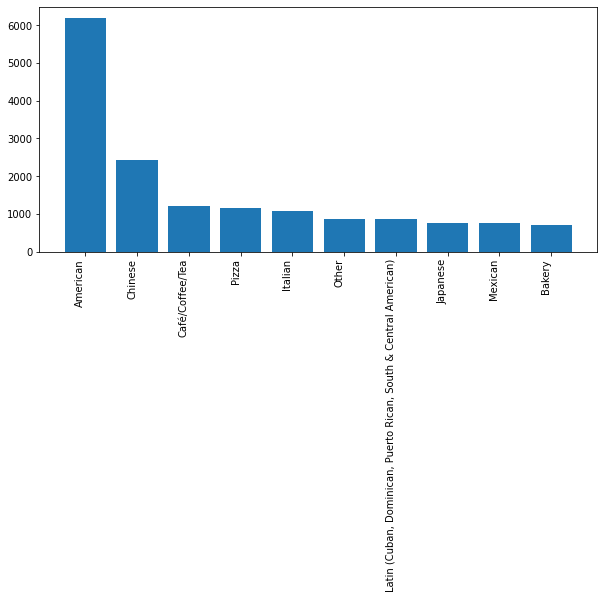

In [ ]:
dati = df1.head(10)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
fig.autofmt_xdate(rotation=90)     
ax.bar(dati['cuisine'],dati['name'])
plt.show()

9 Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
df2 = df.groupby('borough')['name'].count()
df2

borough
Bronx             2322
Brooklyn          6046
Manhattan        10211
Queens            5615
Staten Island      963
Name: name, dtype: int64

10 Visualizzi i dati precedenti in un grafico a torta

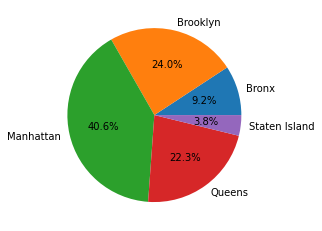

In [ ]:
df2 = df.groupby('borough')['name'].count()
fig = plt.figure()
ax = plt.axes()
ax.pie(df2.values,labels = df2.index,autopct='%1.1f%%')
plt.show()

11 Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici. 

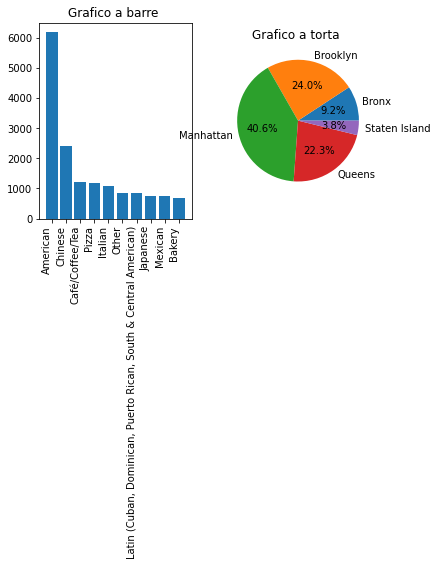

In [ ]:
fig, (ax1, ax2)= plt.subplots(1,2)
fig.autofmt_xdate(rotation=90)    

ax1.bar(dati['cuisine'],dati['name'])
ax1.set_title('Grafico a barre ')

ax2.pie(df2.values,labels = df2.index,autopct='%1.1f%%')
ax2.set_title('Grafico a torta ')

plt.show()

12 Crei un nuovo dataframe sostituendo la parola 'non American' a tutti i tipi di cucina che non sono americani


In [ ]:
df3 = df.replace(df[df['cuisine']!='American']['cuisine'].tolist(),'non American')
df3

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


13 Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato deve essere il seguente:


In [ ]:
df3 = df.groupby(['borough','cuisine']).count()
df3

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

14 crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una
colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve
essere il seguente:

In [ ]:
pivt = df3.unstack()
pivt['name']


cuisine,American,non American
borough,,
Bronx,411,1911
Brooklyn,1273,4773
Manhattan,3205,7006
Queens,1040,4575
Staten Island,244,719


15. resetti l&#39;indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato
deve essere il seguente:

In [ ]:
dati = pivt['name'].reset_index()
dati

cuisine,borough,American,non American
0,Bronx,411,1911
1,Brooklyn,1273,4773
2,Manhattan,3205,7006
3,Queens,1040,4575
4,Staten Island,244,719


16 Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti americani ed una per quelli non americani. Il risultato deve essere il seguente:


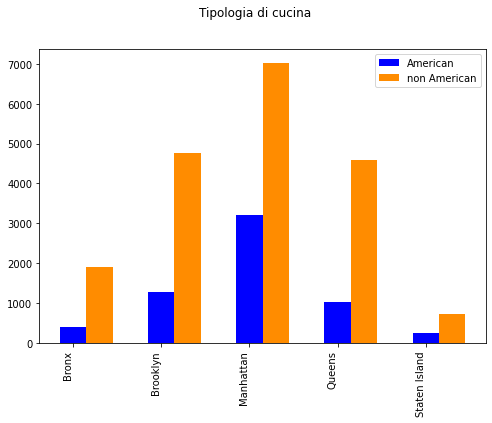

In [ ]:
fig = plt.figure(figsize=(8,6)) 
ax = plt.axes()
ax.bar(dati["borough"],dati["American"],label="American",width=0.3,color="blue")
ax.bar(dati.index+0.3,dati["non American"],label="non American",width=0.3,color="#ff8c00")
fig.autofmt_xdate(rotation=90)
fig.suptitle("Tipologia di cucina")
ax.legend(loc=0)